In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/home/ignis/Downloads/Food-Truck(For Linear Regression Program)(2).csv")

In [28]:
df

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


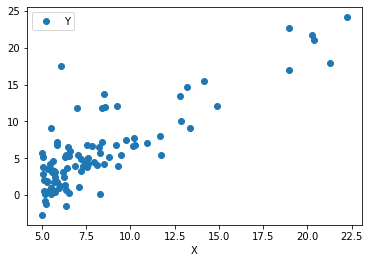

In [29]:
df.plot(x="X", y="Y", style="o")
plt.show()

In [32]:
x_mean = df["X"].mean()
y_mean = df["Y"].mean()
print(x_mean, y_mean)

8.159800000000002 5.83913505154639


In [34]:
df["x"] = df["X"] - x_mean
df["y"] = df["Y"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df


,X,Y,x,y,x*y,x^2,y^2
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581
...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431


In [35]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

1715.219528539 1437.6958578600002 2914.8470516572247


In [36]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5

In [37]:
correlation

0.8378732325263409

In [38]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

0.8378732325263409

In [39]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
    for i in numbers:
        current_sum += i
        current_avg = current_sum/len(numbers)
    return current_avg

In [40]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
    std_deviation = 0
    for i in numbers:
        std_deviation += (i - mean)**2
    return (std_deviation/len(numbers))**0.5

In [42]:
x_mean = df["X"].mean()
y_mean = df["Y"].mean()
print(x_mean, y_mean)
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

8.159800000000002 5.83913505154639
3.849883995922716 5.48178525707763


In [43]:
m = correlation * (std_deviation_y / std_deviation_x)
m

1.1930336441895935

In [45]:
c = df["Y"].mean() - m * df["X"].mean()
c

-3.895780878311858

In [47]:
df["y_prediction"] = m * df["X"] + c

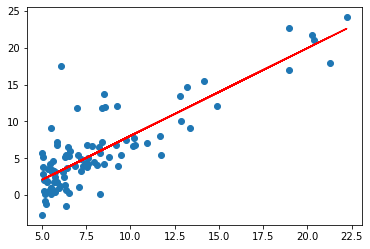

In [49]:
plot1 = plt.scatter(df["X"], df["Y"])
plot2 = plt.plot(df["X"], df["y_prediction"],color="red")
plt.show()

In [50]:
ssr = sum((df["y_prediction"]-y_mean)**2)
ssr

2046.314604718038

In [51]:
sse = ((df["y"]-df["y_prediction"])**2).sum()
sse

4175.795767508352

In [52]:
tss = sum((df["y"]-y_mean)**2)
tss

6222.110372226398

In [53]:
tss_new=sse+ssr
tss_new

6222.11037222639

In [54]:
correlation**2

0.7020315537841398

In [55]:
cost=sse/96
cost

43.497872578212